In [1]:
# Importación de librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('c:\\Users\\Julian\\Desktop\\Cursos\\Cursos Github\\Metodos_estadisticos')

In [3]:
df = pd.read_csv('Data sets\\datos.csv')

In [4]:
print(df.columns)
df.sample(5)

Index(['primary_key', 'MES_x', 'CLASE_x', 'FEX_C18_x', 'DPTO_x', 'SEXO',
       'EDAD', 'CAMPESINO', 'CULTURA', 'EST_CIVIL', 'LEE', 'NIVEL_EDUC',
       'EDUC', 'NIVEL_EDUC_CAT', 'MES_y', 'CLASE_y', 'FEX_C18_y', 'DPTO_y',
       'contrato', 'contrato_verbal', 'termino_contrato', 'misma_empresa',
       'tiempo_trabajo', 'puesto', 'empresa_registrada', 'salario_bruto',
       'hora_semanales', 'no_empleados', 'RAMA2D_R4', 'INGLABO', 'RAMA4D_R4',
       'OFICIO_C8'],
      dtype='object')


,primary_key,MES_x,CLASE_x,FEX_C18_x,DPTO_x,SEXO,EDAD,CAMPESINO,CULTURA,EST_CIVIL,...,tiempo_trabajo,puesto,empresa_registrada,salario_bruto,hora_semanales,no_empleados,RAMA2D_R4,INGLABO,RAMA4D_R4,OFICIO_C8
348525,7551509-1-1-1,septiembre,2,469.363958,Caldas,Hombre,43,1,6,Casado,...,0,7,9.0,600000.0,50,2,1,600000.0,123,9211
103247,7320877-1-1-1,enero,1,106.285507,Arauca,Hombre,35,2,6,Soltero,...,4,4,NaN,NaN,48,7,84,3000000.0,8413,2642
363806,7565361-1-3-1,septiembre,1,126.801473,Cauca,Mujer,26,2,6,Soltero,...,3,3,2.0,400000.0,36,1,97,400000.0,9700,5311
291348,7611677-1-3-1,noviembre,1,1181.397253,Magdalena,Hombre,29,2,6,Pareja >= 2,...,96,4,NaN,NaN,60,1,49,1000000.0,4921,8321
271733,7450151-1-1-1,mayo,2,211.336225,Quindio,Hombre,28,2,6,Soltero,...,12,1,9.0,1800000.0,40,6,1,1800000.0,144,2250


In [28]:
df = df[(df.INGLABO >= 5000)] 
df = df.dropna(subset=['INGLABO'])

In [29]:
pd.options.display.float_format = '{:.2f}'.format
df.INGLABO.describe()

count      348329.00
mean      1496001.39
std       2173975.58
min          5000.00
25%        600000.00
50%       1160000.00
75%       1500000.00
max     124000000.00
Name: INGLABO, dtype: float64

In [30]:
df.EDAD.describe()

count   348329.00
mean        41.15
std         13.90
min         15.00
25%         30.00
50%         40.00
75%         52.00
max         98.00
Name: EDAD, dtype: float64

## Medidas de centralidad

### La media 

La media de un conjunto de observaciones es simplemente un promedio normal y antiguo: se suman todos los valores y luego se divide por el número total de valores.

$$\bar{x} = \frac{1}{n}  \ \sum_{i=1}^{n} x_{i}$$

In [36]:
n = len(df.INGLABO)
Sigma = sum(df.INGLABO)
1/n * Sigma # 1'496.001

1496001.3938316936

In [37]:
df.INGLABO.mean() # mean funciona por numpy y pandas

1496001.3938316936

In [38]:
import statistics
statistics.mean(df.INGLABO)

1496001.3938316936

### La mediana

In [80]:
# Ordenamos los valores
sorted_inglabo = df.INGLABO.sort_values(ascending= True)
sorted_inglabo

321938        5000.00
203173        5000.00
349761        5000.00
62677         5000.00
182917        5000.00
             ...     
103755   100000000.00
135500   100000000.00
318842   100000000.00
225057   100000000.00
91644    124000000.00
Name: INGLABO, Length: 348329, dtype: float64

In [94]:
# Calculamos la mediana

if n % 2 == 1:  # Si el número de elementos es impar
    mediana = sorted_inglabo.iloc[n // 2]  # Tomamos el valor central
else:  # Si el número de elementos es par
    mediana = (sorted_inglabo.iloc[n // 2 - 1] + sorted_inglabo.iloc[n // 2]) / 2  # Promedio de los dos valores centrales

print(mediana)


1160000.0


In [106]:
# Creamos la formula

def fmediana(x):
    import pandas as pd
    x = pd.Series(x)
    n = len(x)
    x = x.sort_values(ascending= True)
    if n % 2 == 1:
        return x.iloc[n // 2] 
    else: 
        return (x.iloc[n // 2 - 1] + x.iloc[n // 2]) / 2

In [107]:
fmediana(df.INGLABO)

1160000.0

In [108]:
df.INGLABO.median()

1160000.0

In [109]:
fmediana(df.EDUC)

3.0

In [110]:
df.EDUC.median()

3.0

### Media o mediana

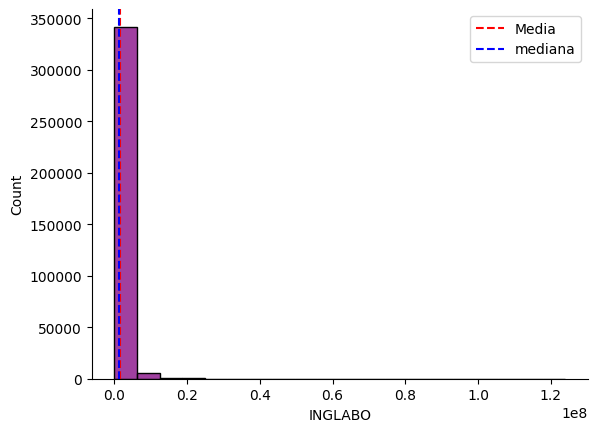

In [118]:
media = df.INGLABO.mean()
mediana = df.INGLABO.median()

sns.histplot(df.INGLABO, bins='sturges', color = 'purple')
plt.axvline(media, color = 'red', linestyle = '--', label = 'Media')
plt.axvline(mediana, color = 'blue', linestyle = '--', label = 'mediana')

plt.legend()

sns.despine();

In [115]:
def comparacion_centralidad(x, bins = 'sturges', color_bars = 'purple', color_media = 'red',color_mediana = 'blue'):
    x = pd.Series(x)
    
    media = x.mean()
    mediana = x.median()
    
    sns.histplot(x, bins = bins, color = color_bars)
    plt.axvline(media, color = color_media, linestyle = '--', label = 'Media')
    plt.axvline(mediana, color = color_mediana, linestyle = '--', label = 'Mediana')
    plt.legend()
    plt.plot()

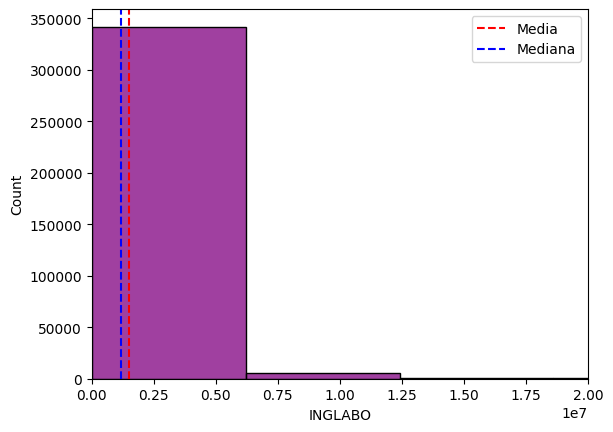

In [126]:
comparacion_centralidad(df.INGLABO)
plt.xlim(0,20000000);

In [120]:
df.columns

Index(['primary_key', 'MES_x', 'CLASE_x', 'FEX_C18_x', 'DPTO_x', 'SEXO',
       'EDAD', 'CAMPESINO', 'CULTURA', 'EST_CIVIL', 'LEE', 'NIVEL_EDUC',
       'EDUC', 'NIVEL_EDUC_CAT', 'MES_y', 'CLASE_y', 'FEX_C18_y', 'DPTO_y',
       'contrato', 'contrato_verbal', 'termino_contrato', 'misma_empresa',
       'tiempo_trabajo', 'puesto', 'empresa_registrada', 'salario_bruto',
       'hora_semanales', 'no_empleados', 'RAMA2D_R4', 'INGLABO', 'RAMA4D_R4',
       'OFICIO_C8'],
      dtype='object')